# Lab 03: PyTorch를 이용한 선형회귀 (Linear Regression)

이 노트북에서는 다음을 수행합니다:
1. 공부한 시간(x)과 성적(y) 데이터 사용
2. PyTorch `nn.Linear`를 사용해 선형회귀 층 생성
3. Adam Optimizer를 사용한 모델 학습
4. 1000 epoch 동안 loss가 줄어드는 과정 시각화

### Prompt

다음 요구사항에 맞춰 PyTorch 코드를 작성해줘:

 1. 데이터 생성 : 공부한 시간(x)과 성적(y) 데이터를 사용

 2. 모델 정의 : nn.Linear를 사용해 선형회귀 층 구현

 3. 설정 : Adam Optimizer 사용

 4. 학습 및 시각화 : 1000 epoch 학습 및 Loss 감소 그래프 출력

 저장 : 전체 코드를 Lab03.ipynb로 저장


In [15]:
# 필요한 라이브러리 임포트
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 재현성을 위한 시드 설정
torch.manual_seed(42)
np.random.seed(42)

## 1. 데이터 준비

공부한 시간(x)과 성적(y) 데이터를 정의합니다.
- x: 공부 시간 [1, 3, 3.5, 5, 7, 9.5, 12, 15] 시간
- y: 성적 [0, 20, 28, 41, 60, 87, 92, 100] 점

In [16]:
# 데이터 정의: 공부한 시간(x)과 성적(y)
x = np.array([[1], [3], [3.5], [5], [7], [9.5], [12], [15]], dtype=np.float32)
y = np.array([[0], [20], [28], [41], [60], [87], [92], [100]], dtype=np.float32)

# NumPy 배열을 PyTorch 텐서로 변환
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

num_samples = len(x)

print(f"Data shape: x={x_tensor.shape}, y={y_tensor.shape}")
print(f"Study hours range: {x_tensor.min():.2f} ~ {x_tensor.max():.2f} hours")
print(f"Score range: {y_tensor.min():.2f} ~ {y_tensor.max():.2f} points")
print(f"\nData:")
print(f"x = {x.flatten().tolist()}")
print(f"y = {y.flatten().tolist()}")

Data shape: x=torch.Size([8, 1]), y=torch.Size([8, 1])
Study hours range: 1.00 ~ 15.00 hours
Score range: 0.00 ~ 100.00 points

Data:
x = [1.0, 3.0, 3.5, 5.0, 7.0, 9.5, 12.0, 15.0]
y = [0.0, 20.0, 28.0, 41.0, 60.0, 87.0, 92.0, 100.0]


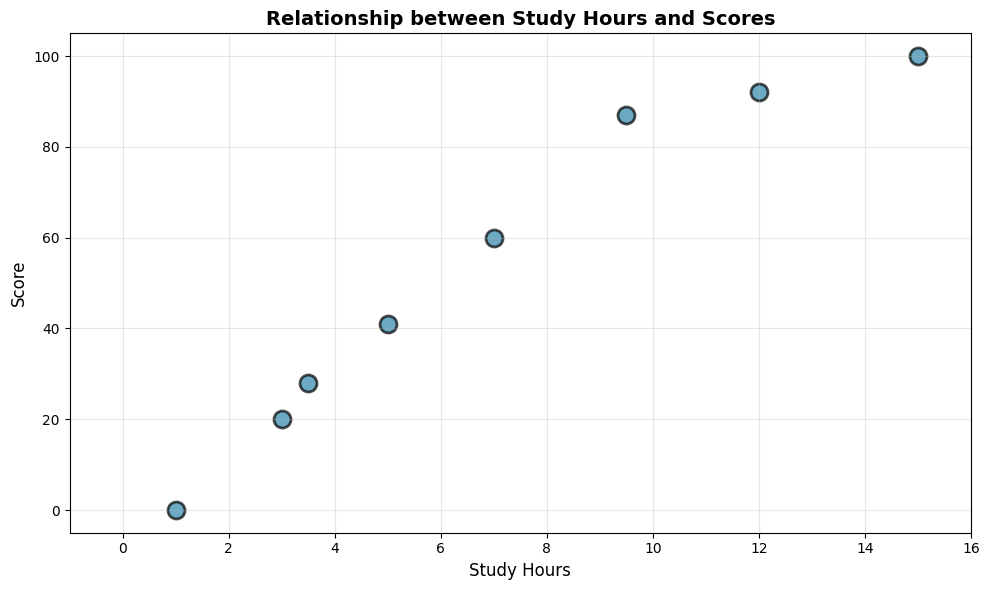

In [17]:
# 생성된 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, s=150, edgecolors='black', linewidth=2, color='#2E86AB')
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Relationship between Study Hours and Scores', fontsize=14, fontweight='bold')
plt.xlim(-1, 16)
plt.ylim(-5, 105)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. 모델 정의

`nn.Linear`를 사용하여 선형회귀 모델을 정의합니다.
- 입력: 1개 (공부 시간)
- 출력: 1개 (성적)
- 모델: y = wx + b

In [18]:
# 선형회귀 모델 정의
# nn.Linear(in_features, out_features)
# in_features=1: 입력 특성 개수 (공부 시간)
# out_features=1: 출력 특성 개수 (성적)
model = nn.Linear(in_features=1, out_features=1)

print("Model structure:")
print(model)
print("\nInitial parameters:")
print(f"Weight: {model.weight.item():.4f}")
print(f"Bias: {model.bias.item():.4f}")

Model structure:
Linear(in_features=1, out_features=1, bias=True)

Initial parameters:
Weight: 0.7645
Bias: 0.8300


## 3. 손실 함수와 옵티마이저 설정

- **손실 함수**: MSE (Mean Squared Error) - 회귀 문제에 적합
- **옵티마이저**: Adam - 학습률을 자동으로 조정하는 효율적인 옵티마이저

In [19]:
# 손실 함수: MSE (Mean Squared Error)
criterion = nn.MSELoss()

# 옵티마이저: Adam
# lr=0.01: 학습률 (learning rate)
optimizer = optim.Adam(model.parameters(), lr=0.01)

print("Loss function:", criterion)
print("Optimizer:", optimizer)

Loss function: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


## 4. 모델 학습

1000 epoch 동안 모델을 학습하고 loss를 기록합니다.

In [20]:
# 학습 설정
num_epochs = 1000
loss_history = []  # loss 기록을 위한 리스트

# 학습 루프
for epoch in range(num_epochs):
    # 1. Forward pass: 예측값 계산
    predictions = model(x_tensor)
    
    # 2. 손실 계산
    loss = criterion(predictions, y_tensor)
    
    # 3. Backward pass: 그래디언트 계산
    optimizer.zero_grad()  # 이전 그래디언트 초기화
    loss.backward()  # 역전파로 그래디언트 계산
    
    # 4. 파라미터 업데이트
    optimizer.step()
    
    # 5. Loss 기록
    loss_history.append(loss.item())
    
    # 100 epoch마다 진행 상황 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("\nTraining completed!")
print(f"\nFinal parameters:")
print(f"Weight: {model.weight.item():.4f}")
print(f"Bias: {model.bias.item():.4f}")
print(f"\nLearned relationship: y = {model.weight.item():.4f} * x + {model.bias.item():.4f}")

Epoch [100/1000], Loss: 2305.7275
Epoch [200/1000], Loss: 1602.5896
Epoch [300/1000], Loss: 1084.7384
Epoch [400/1000], Loss: 716.6999
Epoch [500/1000], Loss: 465.5069
Epoch [600/1000], Loss: 301.6656
Epoch [700/1000], Loss: 200.0165
Epoch [800/1000], Loss: 140.2813
Epoch [900/1000], Loss: 107.1380
Epoch [1000/1000], Loss: 89.8035

Training completed!

Final parameters:
Weight: 6.4753
Bias: 6.2574

Learned relationship: y = 6.4753 * x + 6.2574


## 5. Loss 감소 과정 시각화

1000 epoch 동안 loss가 어떻게 감소하는지 시각화합니다.

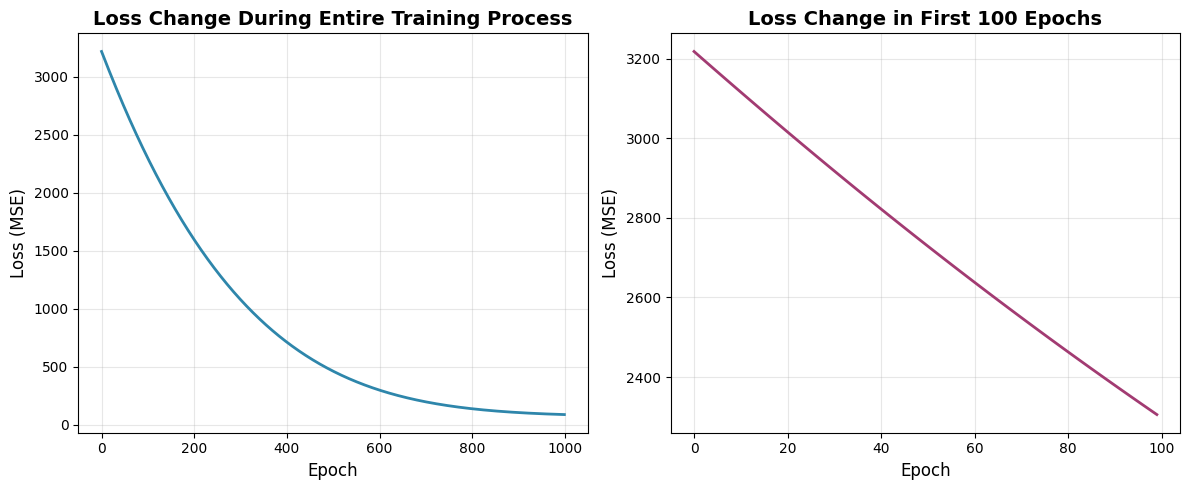

Initial Loss: 3218.2537
Final Loss: 89.8035
Loss Reduction Rate: 97.21%


In [21]:
# Loss 감소 과정 시각화
plt.figure(figsize=(12, 5))

# 전체 loss 그래프
plt.subplot(1, 2, 1)
plt.plot(loss_history, linewidth=2, color='#2E86AB')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Loss Change During Entire Training Process', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 처음 100 epoch의 loss (초기 학습 과정 확대)
plt.subplot(1, 2, 2)
plt.plot(loss_history[:100], linewidth=2, color='#A23B72')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Loss Change in First 100 Epochs', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Initial Loss: {loss_history[0]:.4f}")
print(f"Final Loss: {loss_history[-1]:.4f}")
print(f"Loss Reduction Rate: {(1 - loss_history[-1]/loss_history[0]) * 100:.2f}%")

## 6. 학습 결과 시각화

원본 데이터와 학습된 선형회귀 선을 함께 시각화합니다.

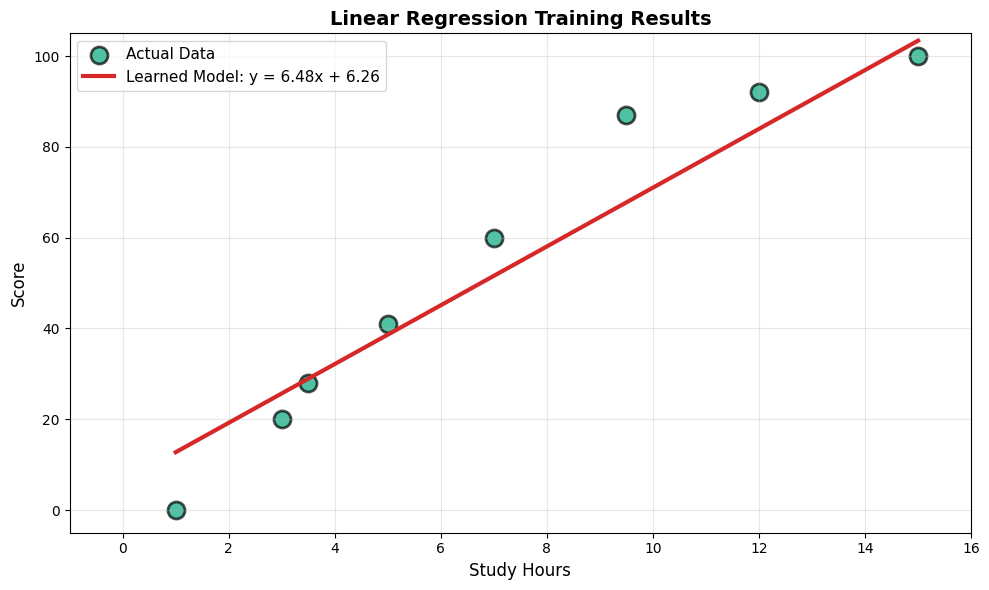

In [22]:
# 학습된 모델로 예측
model.eval()  # 평가 모드로 전환
with torch.no_grad():  # 그래디언트 계산 비활성화
    predicted = model(x_tensor).numpy()

# 결과 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터
plt.scatter(x, y, alpha=0.7, s=150, label='Actual Data', 
            edgecolors='black', linewidth=2, color='#06A77D')

# 학습된 회귀선
plt.plot(x, predicted, color='#D62828', linewidth=3, 
         label=f'Learned Model: y = {model.weight.item():.2f}x + {model.bias.item():.2f}')

plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Linear Regression Training Results', fontsize=14, fontweight='bold')
plt.xlim(-1, 16)
plt.ylim(-5, 105)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. 모델 성능 평가

학습된 모델의 예측 정확도를 평가합니다.

In [23]:
# 각 데이터 포인트별 예측 결과 출력
model.eval()
with torch.no_grad():
    predictions = model(x_tensor).numpy()

print("Detailed Predictions:")
print("=" * 70)
print(f"{'Index':<6} {'Hours':<8} {'Actual':<10} {'Predicted':<12} {'Error':<10}")
print("=" * 70)

total_error = 0
for i, (hour, actual, pred) in enumerate(zip(x, y, predictions)):
    error = abs(actual[0] - pred[0])
    total_error += error
    print(f"[{i+1}]    {hour[0]:5.1f}h   {actual[0]:6.1f}     {pred[0]:8.2f}      {error:6.2f}")

print("=" * 70)
print(f"Mean Absolute Error (MAE): {total_error / num_samples:.2f}")

Detailed Predictions:
Index  Hours    Actual     Predicted    Error     
[1]      1.0h      0.0        12.73       12.73
[2]      3.0h     20.0        25.68        5.68
[3]      3.5h     28.0        28.92        0.92
[4]      5.0h     41.0        38.63        2.37
[5]      7.0h     60.0        51.58        8.42
[6]      9.5h     87.0        67.77       19.23
[7]     12.0h     92.0        83.96        8.04
[8]     15.0h    100.0       103.39        3.39
Mean Absolute Error (MAE): 7.60


## 8. 새로운 데이터로 예측

학습된 모델을 사용하여 새로운 공부 시간에 대한 성적을 예측합니다.

In [24]:
# 새로운 공부 시간에 대한 예측
test_hours = torch.FloatTensor([[2.0], [4.0], [6.0], [8.0], [10.0]])

model.eval()
with torch.no_grad():
    predicted_scores = model(test_hours)

print("Prediction Results:")
print("-" * 40)
for hours, score in zip(test_hours, predicted_scores):
    print(f"Study Hours: {hours.item():.1f}h → Predicted Score: {score.item():.2f} points")

Prediction Results:
----------------------------------------
Study Hours: 2.0h → Predicted Score: 19.21 points
Study Hours: 4.0h → Predicted Score: 32.16 points
Study Hours: 6.0h → Predicted Score: 45.11 points
Study Hours: 8.0h → Predicted Score: 58.06 points
Study Hours: 10.0h → Predicted Score: 71.01 points


## 9. 새로운 데이터 예측 결과 시각화

학습 데이터와 새로운 테스트 데이터의 예측 결과를 함께 시각화합니다.

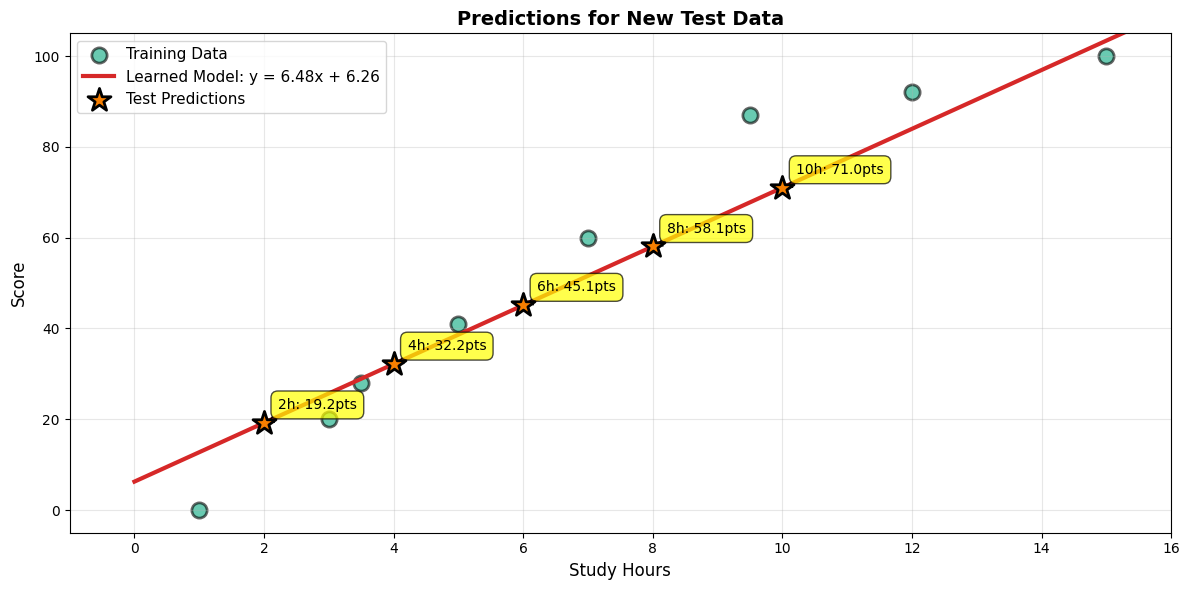

In [25]:
# 새로운 데이터 예측 결과 시각화
plt.figure(figsize=(12, 6))

# 원본 학습 데이터
plt.scatter(x, y, alpha=0.6, s=120, label='Training Data', 
            edgecolors='black', linewidth=2, color='#06A77D')

# 학습된 회귀선 (전체 범위)
x_line = np.linspace(0, 16, 100).reshape(-1, 1)
with torch.no_grad():
    y_line = model(torch.FloatTensor(x_line)).numpy()
plt.plot(x_line, y_line, color='#D62828', linewidth=3, 
         label=f'Learned Model: y = {model.weight.item():.2f}x + {model.bias.item():.2f}')

# 새로운 테스트 데이터 예측 결과
test_hours_np = test_hours.numpy()
predicted_scores_np = predicted_scores.numpy()
plt.scatter(test_hours_np, predicted_scores_np, s=300, marker='*', 
            color='#F77F00', edgecolors='black', linewidth=2, 
            label='Test Predictions', zorder=5)

# 테스트 데이터 포인트에 레이블 추가
for i, (hour, score) in enumerate(zip(test_hours_np, predicted_scores_np)):
    plt.annotate(f'{hour[0]:.0f}h: {score[0]:.1f}pts', 
                 xy=(hour[0], score[0]), 
                 xytext=(10, 10), 
                 textcoords='offset points',
                 fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='black'))

plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Predictions for New Test Data', fontsize=14, fontweight='bold')
plt.xlim(-1, 16)
plt.ylim(-5, 105)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()